<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

# LassoLars with MinMaxScaler and PowerTransformer

This Code template is for the regression analysis using a LassoLars Regression and the feature rescaling technique MinMaxScaler along with PowerTransformer as a feature transformation technique in a pipeline

### Required Packages

In [4]:
import warnings as wr
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LassoLars
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
wr.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [5]:
#filepath
file_path= ""

List of features which are  required for model training .

In [6]:
#x_values
features=[]

Target feature for prediction.

In [7]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [8]:
df=pd.read_csv(file_path) 
df.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [9]:
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

Number of rows are : 6000 ,and number of columns are : 8


In [10]:
df.columns.tolist()


['Carat Weight',
 'Cut',
 'Color',
 'Clarity',
 'Polish',
 'Symmetry',
 'Report',
 'Price']

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [11]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

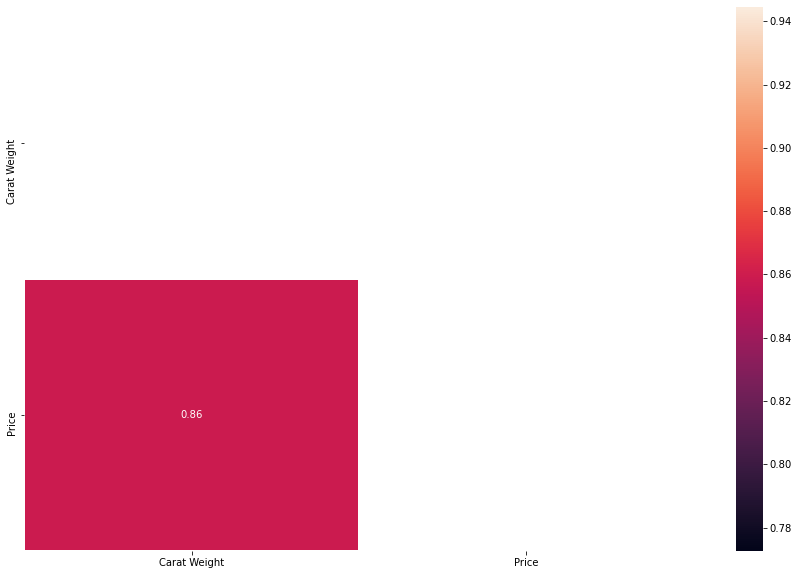

In [12]:
plt.figure(figsize = (15, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [13]:
correlation = df[df.columns[1:]].corr()[target][:]
correlation

Price    1.0
Name: Price, dtype: float64

### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [14]:
X=df[features]
Y=df[target]  

Calling preprocessing functions on the feature and target set.

In [15]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG
0,1.10,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
1,0.83,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0.85,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
3,0.91,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,0.83,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1) #performing datasplitting


### Data Scaling
**MinMaxScaler :**
* Transform features by scaling each feature to a given range.

* This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

### Feature Transformation
**PowerTransformer :**
* Apply a power transform featurewise to make data more Gaussian-like.

* Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.
## Model
**LassoLars :**

LassoLars is a lasso model implemented using the LARS algorithm, and unlike the implementation based on coordinate descent, this yields the exact solution, which is piecewise linear as a function of the norm of its coefficients.

**Tuning parameters:**

* fit_intercept -> whether to calculate the intercept for this model. If set to false, no intercept will be used in calculations

* alpha -> Constant that multiplies the penalty term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square, solved by LinearRegression. For numerical reasons, using alpha = 0 with the LassoLars object is not advised and you should prefer the LinearRegression object.

* eps -> The machine-precision regularization in the computation of the Cholesky diagonal factors. Increase this for very ill-conditioned systems. Unlike the tol parameter in some iterative optimization-based algorithms, this parameter does not control the tolerance of the optimization.

* max_iter -> Maximum number of iterations to perform.

* positive -> Restrict coefficients to be >= 0. Be aware that you might want to remove fitintercept which is set True by default. Under the positive restriction the model coefficients will not converge to the ordinary-least-squares solution for small values of alpha. Only coefficients up to the smallest alpha value (alphas[alphas_ > 0.].min() when fit_path=True) reached by the stepwise Lars-Lasso algorithm are typically in congruence with the solution of the coordinate descent Lasso estimator.

* precompute -> Whether to use a precomputed Gram matrix to speed up calculations.


In [17]:
model = make_pipeline(MinMaxScaler(),PowerTransformer(),LassoLars(random_state=1))
model.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('powertransformer', PowerTransformer()),
                ('lassolars', LassoLars(random_state=1))])

#### Model Accuracy
score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [18]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 74.09 %



In [19]:
#prediction on testing set
prediction=model.predict(X_test)

### Model evolution


**r2_score:** The r2_score function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.

**MAE:** The mean abosolute error function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.

**MSE:** The mean squared error function squares the error(penalizes the model for large errors) by our model.

In [20]:
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, prediction)))

Mean Absolute Error: 3599.49587561896
Mean Squared Error: 27838818.860113323
Root Mean Squared Error: 5276.250454642323


In [21]:
print("R-squared score : ",r2_score(y_test,prediction))

R-squared score :  0.7409028046950552


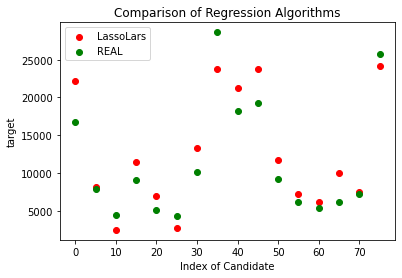

In [22]:
#ploting actual and predicted
red = plt.scatter(np.arange(0,80,5),prediction[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "green")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("target")
plt.legend((red,green),('LassoLars', 'REAL'))
plt.show()


### Prediction Plot
First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis. For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

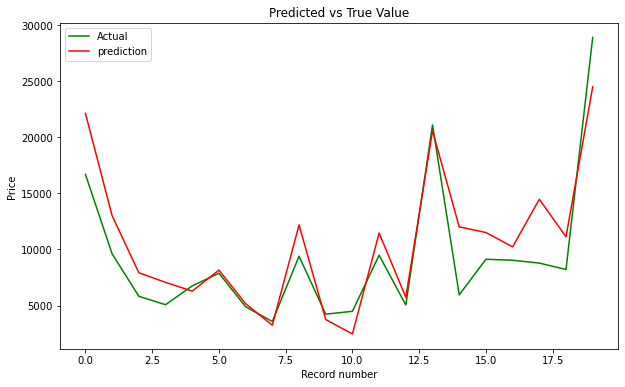

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Neel Pawar, Github: [Profile]( https://github.com/neel-ntp)